## Time series

### Let’s start with the Preliminaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv('time_series_covid19_confirmed_global.csv',delimiter=";")
data.head()


,Date,confirmed_cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [3]:
print ('\n Data Types:')
data.dtypes


 Data Types:


Date               object
confirmed_cases     int64
dtype: object

Dataset Description 

The data contains a particular month and number of passengers travelling in that month .The data type here is object (month) Let’s convert it into a Time series object and use the Month column as our index.



Timestamps are useful objects for comparisons. You can create a timestamp object with the pd.to_datetime function and a string specifying the date. These timestamps are useful when you need to do logical filtering with dates.

In [4]:
from datetime import datetime
con=data['Date']
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

In [5]:
#convert to time series:
ts = data['confirmed_cases']
ts.head(10)

Date
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
2020-01-27    1
2020-01-28    4
2020-01-29    4
2020-01-30    4
2020-01-31    5
Name: confirmed_cases, dtype: int64

### Let’s explore the various properties of date-time based index:

In [6]:
#1. Specific the index as a string constant:
ts['2020-01-31']

5

### STATIONARITY

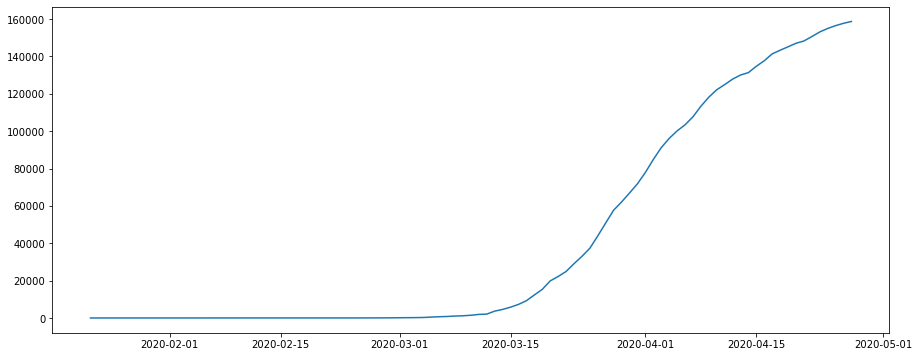

In [7]:
plt.plot(ts)

In [8]:
pip install statsmodels

It’s clear from the plot that there is an overall increase in the trend and with some seasonality in it.

#### Stationarity testing 

In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

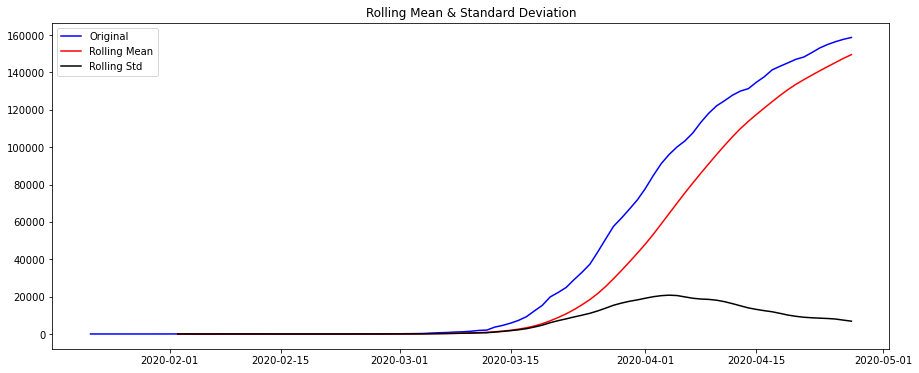

Results of Dickey-Fuller Test:
Test Statistic                  0.647146
p-value                         0.988722
#Lags Used                     11.000000
Number of Observations Used    85.000000
Critical Value (1%)            -3.509736
Critical Value (5%)            -2.896195
Critical Value (10%)           -2.585258
dtype: float64


In [10]:
test_stationarity(ts)

### MAKING THE TIME SERIES STATIONARY

#### TREND 

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


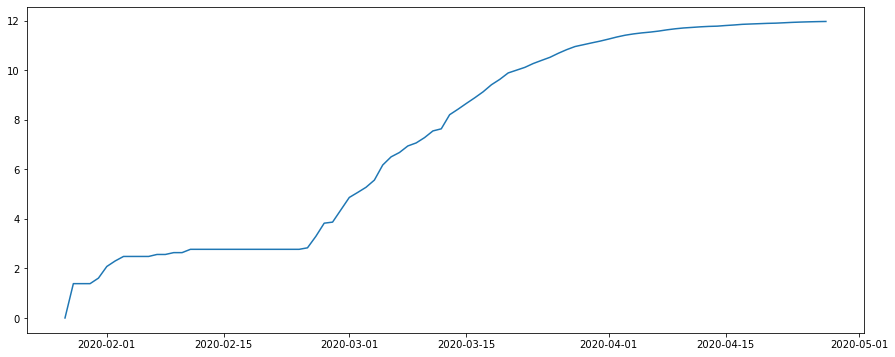

In [11]:
ts_log = np.log(ts)
plt.plot(ts_log)

##### Smoothing 

###### Moving average

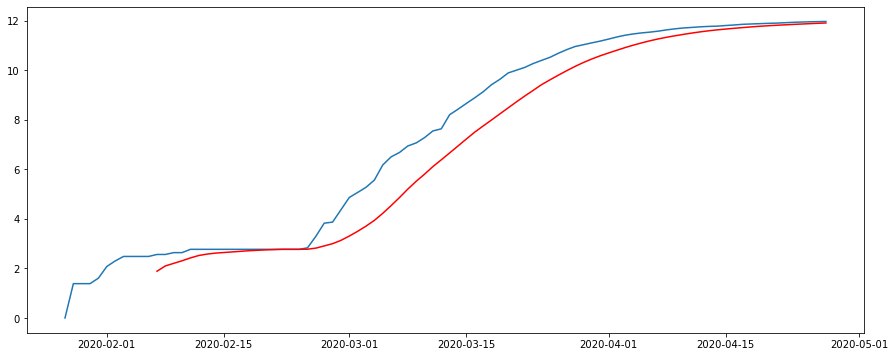

In [12]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [13]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2020-01-22   NaN
2020-01-23   NaN
2020-01-24   NaN
2020-01-25   NaN
2020-01-26   NaN
2020-01-27   NaN
2020-01-28   NaN
2020-01-29   NaN
2020-01-30   NaN
2020-01-31   NaN
2020-02-01   NaN
2020-02-02   NaN
Name: confirmed_cases, dtype: float64

In [14]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Date
2020-02-07    0.677039
2020-02-08    0.463293
2020-02-09    0.433004
2020-02-10    0.328607
2020-02-11    0.346614
Name: confirmed_cases, dtype: float64

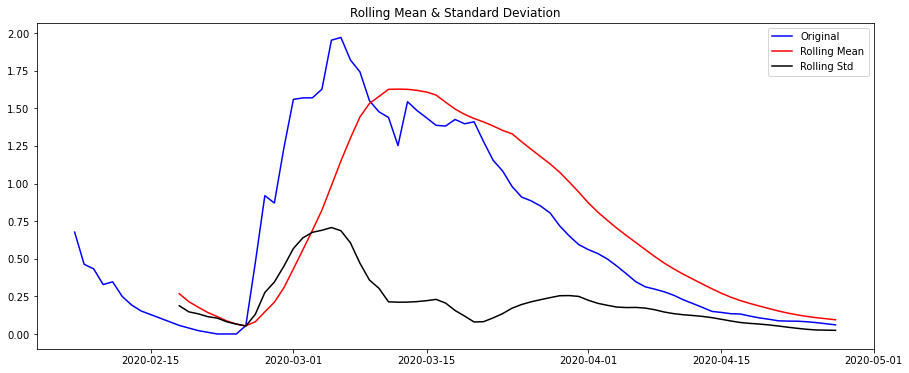

Results of Dickey-Fuller Test:
Test Statistic                 -1.782938
p-value                         0.388965
#Lags Used                      3.000000
Number of Observations Used    77.000000
Critical Value (1%)            -3.518281
Critical Value (5%)            -2.899878
Critical Value (10%)           -2.587223
dtype: float64


In [15]:
test_stationarity(ts_log_moving_avg_diff)

###### Exponentially weighted moving average

Date
2020-01-22          NaN
2020-01-23          NaN
2020-01-24          NaN
2020-01-25          NaN
2020-01-26          NaN
                ...    
2020-04-23    11.822809
2020-04-24    11.842557
2020-04-25    11.860763
2020-04-26    11.877399
2020-04-27    11.892435
Name: confirmed_cases, Length: 97, dtype: float64

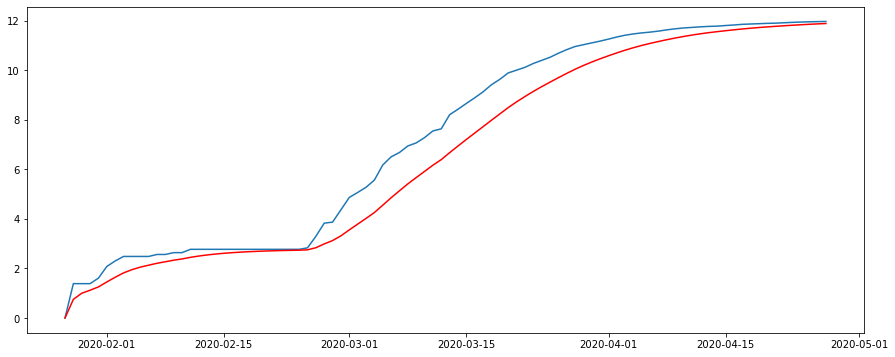

In [16]:
expwighted_avg = pd.DataFrame.ewm(ts_log, span=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
pd.DataFrame.ewm(ts_log, span=12).mean()


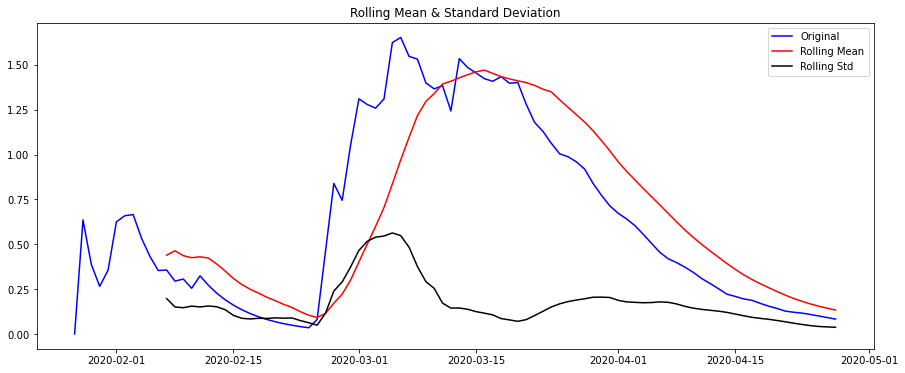

Results of Dickey-Fuller Test:


MissingDataError: exog contains inf or nans

In [17]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

#### SEASONALITY (ALONG WITH TREND) 

In [ ]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [ ]:
ts_log_diff.isnull().sum()

In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

### FORECASTING A TIME SERIES 

#### ACF & PACF  

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_log_diff, lags =20)
plot_pacf(ts_log_diff, lags =20)

plt.show()

NameError: name 'ts_log_diff' is not defined

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [20]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv',delimiter=";")


from datetime import datetime
con=df['Date']
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)



In [21]:
df = df['2020-03-10':'2020-04-20']
#convert to time series:



In [22]:
df

,confirmed_cases
Date,
2020-03-10,1457
2020-03-11,1908
2020-03-12,2078
2020-03-13,3675
2020-03-14,4585
2020-03-15,5795
2020-03-16,7272
2020-03-17,9257
2020-03-18,12327


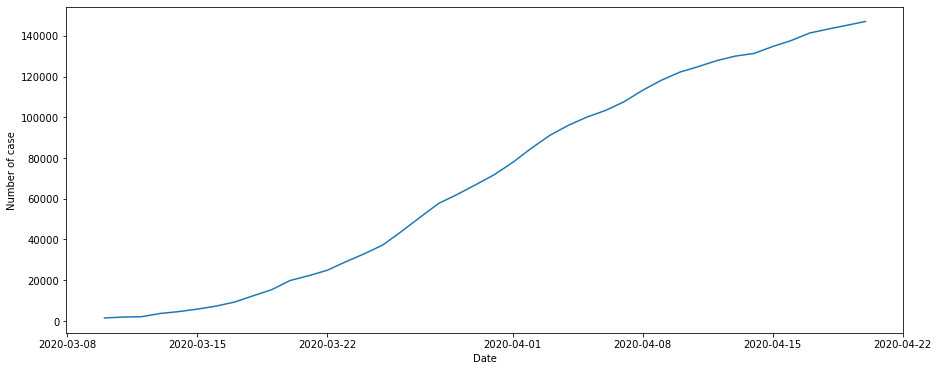

In [23]:
df = df['confirmed_cases']
df.head(10)
plt.xlabel('Date')
plt.ylabel('Number of case')
plt.plot(df)

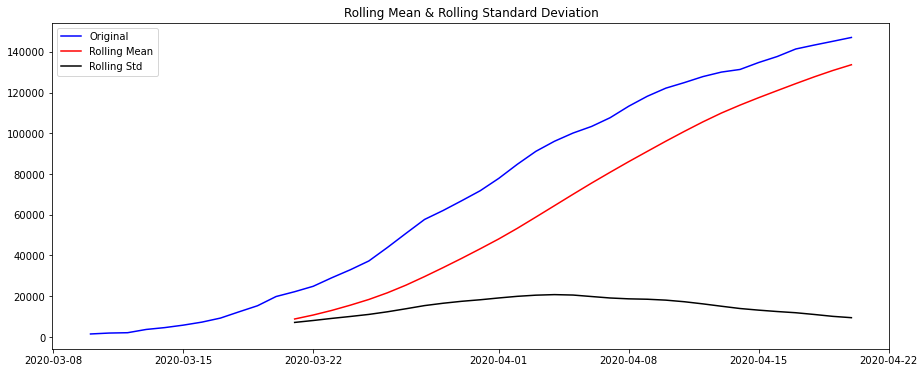

In [24]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

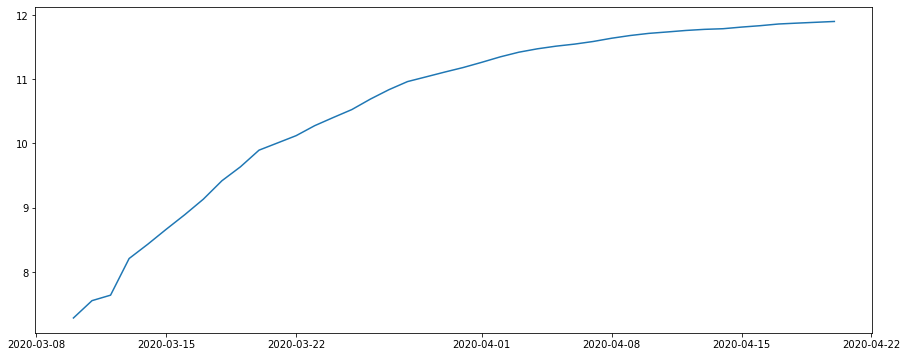

In [25]:
df_log = np.log(df)
plt.plot(df_log)

In [26]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['confirmed_cases'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

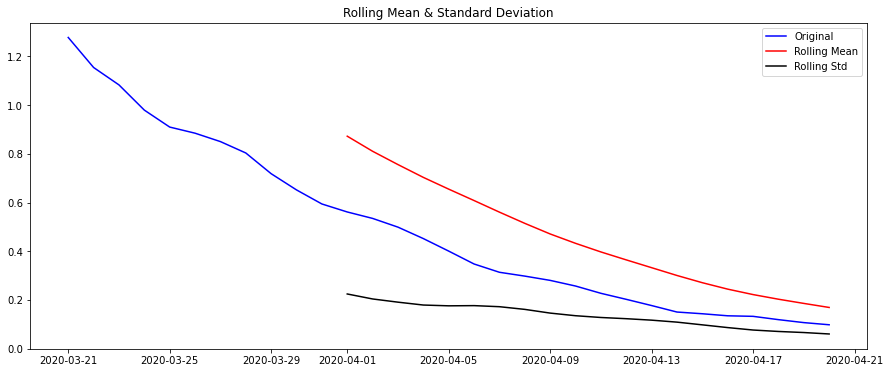

KeyError: 'confirmed_cases'

In [27]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

In [ ]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

In [ ]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

In [28]:
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


NameError: name 'df_log_shift' is not defined

In [ ]:
df_log

In [ ]:
ABM_data = pd.read_csv('ABM_data.csv',delimiter=";")
ABM_conform_data = ABM_data['confirmed_cases']
from datetime import datetime

ABM_data['day']=pd.to_datetime(ABM_data['confirmed_cases'], unit='D',  origin='2020-03-01')
ABM_data.set_index('day', inplace=True)
#check datatype of index
ABM_data.index

In [29]:
EBM_data = pd.read_csv('EBM_data.csv',delimiter=";")
EBM_conform_data = EBM_data['confirmed_cases']
from datetime import datetime

EBM_data['day']=pd.to_datetime(EBM_data['confirmed_cases'] , unit='s',  origin='2020-03-01')
EBM_data.set_index('day', inplace=True)
#check datatype of index
EBM_data.index

DatetimeIndex(['2020-03-01 00:00:01', '2020-03-01 00:00:02',
               '2020-03-01 00:00:02', '2020-03-01 00:00:02',
               '2020-03-01 00:00:03', '2020-03-01 00:00:04',
               '2020-03-01 00:00:05', '2020-03-01 00:00:07',
               '2020-03-01 00:00:09', '2020-03-01 00:00:12',
               '2020-03-01 00:00:16', '2020-03-01 00:00:21',
               '2020-03-01 00:00:27', '2020-03-01 00:00:36',
               '2020-03-01 00:00:48', '2020-03-01 00:01:04',
               '2020-03-01 00:01:25', '2020-03-01 00:01:53',
               '2020-03-01 00:02:31', '2020-03-01 00:03:21',
               '2020-03-01 00:04:27', '2020-03-01 00:05:55',
               '2020-03-01 00:07:52', '2020-03-01 00:10:29',
               '2020-03-01 00:13:57', '2020-03-01 00:18:33',
               '2020-03-01 00:24:42', '2020-03-01 00:32:51',
               '2020-03-01 00:43:43', '2020-03-01 00:58:08',
               '2020-03-01 01:17:19', '2020-03-01 01:42:47',
               '2020-03-

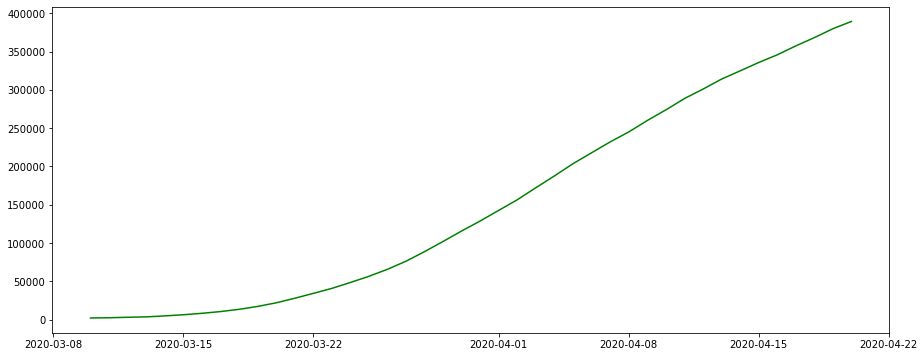

In [30]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log[2], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)

plt.plot(predictions_ARIMA, color='green', label='Clasic Time series pridiction')


#plt.plot(ABM_data, color='blue', label='Agent basedc model data')

#plt.plot(EBM_data,color='orange', label='SIR scenarios')

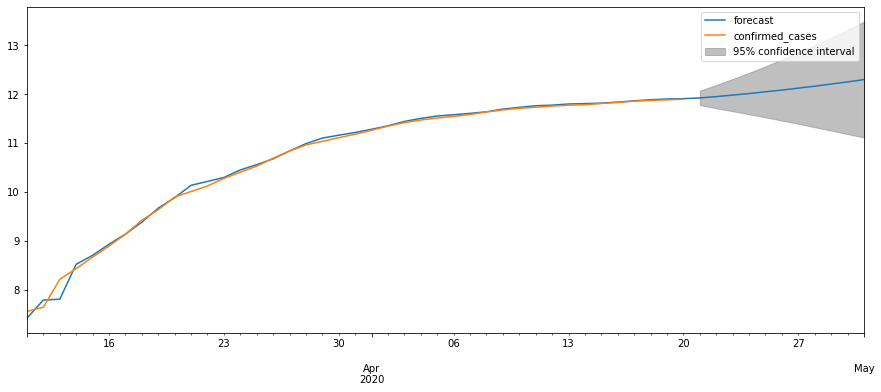

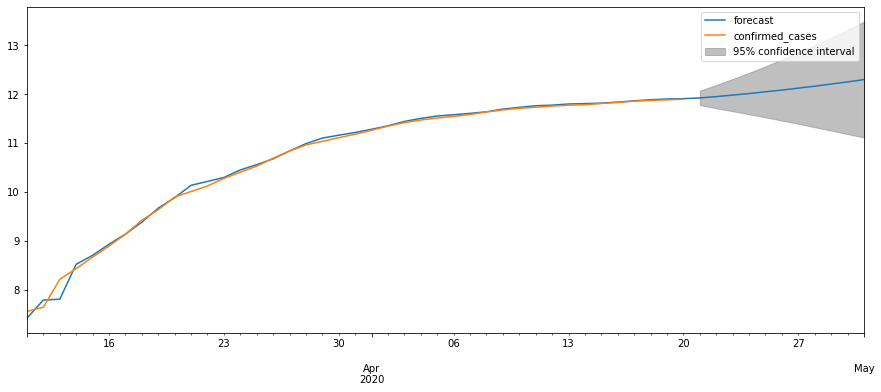

In [31]:
results.plot_predict(1,52)

In [44]:
print(y_data)

[1, 2, 3, 4]


In [46]:
print(EBM_conform_data[:4])

0    1
1    2
2    2
3    2
Name: confirmed_cases, dtype: int64


In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_value = sqrt(mean_squared_error(y_data, EBM_conform_data[:4]))

print(rmse_value)


1.118033988749895


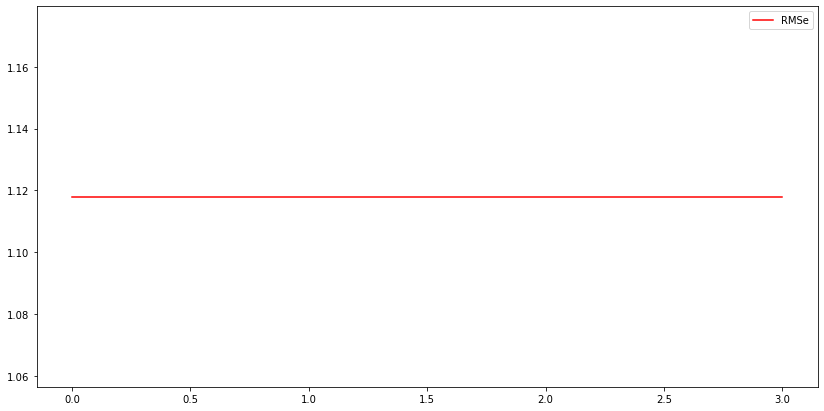

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=[]
for i in range(len(y_data)):
   #print(sqrt(((ABM_data_test.values[i][0] - ABM_data_forecast[i]) ** 2).mean()))
   rmse.append(sqrt(mean_squared_error(y_data, EBM_conform_data[:4])))


plt.figure(figsize=(14, 7))
plt.plot(range(len(EBM_conform_data[:4])), rmse, color="red", label="RMSe")
plt.legend()